In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# custom functions
from functions import *

2024-11-17 02:01:03.410733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731805263.653613   87503 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731805263.713264   87503 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 02:01:04.391782: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1).reset_index(drop=True)

In [3]:
df

,name,url,title,lemmes,funny
0,huffpost,https://www.huffingtonpost.fr/actualites/artic...,"VIDÉO. Pokemon, Deadpool... les génériques ...",video pokemon deadpool generique bande annonce...,1
1,la_depeche,https://www.ladepeche.fr/2024/10/03/des-teleph...,Des téléphones reconditionnés offerts aux asso...,telephone reconditionner offrir association vi...,0
2,le_parisien,https://www.leparisien.fr/sports/tennis/tennis...,"Qu’est-ce que le clostebol, ce produit conside...",clostebol produit considere dopant tennisman j...,0
3,le_parisien,https://www.leparisien.fr/sports/football/ligu...,« Merci » : le petit mot (ou pas) de Mbappé a...,petit mot mbappe psg apres titre meilleur bute...,0
4,le_parisien,https://www.leparisien.fr/societe/sante/allerg...,Allergies : tensions d’approvisionnement des s...,allergie tension approvisionnement stylo adren...,0
...,...,...,...,...,...
106557,huffpost,https://www.huffingtonpost.fr/insolite/article...,"En pleine randonnée, ces promeneurs ont crois...",plein randonnee promeneur croise serpent tre t...,1
106558,ouest_france,https://www.ouest-france.fr/monde/etats-unis/e...,"Élections américaines 2024. Directs, duplex....",elections americaine direct duplex chaine tele...,0
106559,le_monde,https://www.lemonde.fr/m-le-mag/article/2024/0...,"Les JO de Paris, une parenthèse enchantée immo...",jo paris parenthese enchante immortaliser phot...,0
106560,le_parisien,https://www.leparisien.fr/seine-saint-denis-93...,Noisy-le-Sec : un automobiliste blessé par un...,noisy-le-sec automobiliste blesse tir fusil su...,0


In [4]:
X = CountVectorizer().fit_transform(df.lemmes)

In [5]:
X.shape

(106562, 48945)

In [6]:
X = CountVectorizer(min_df=50).fit_transform(df.lemmes)

In [7]:
X.shape

(106562, 2981)

In [8]:
X.toarray().shape

(106562, 2981)

In [9]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Figure size 800x600 with 0 Axes>

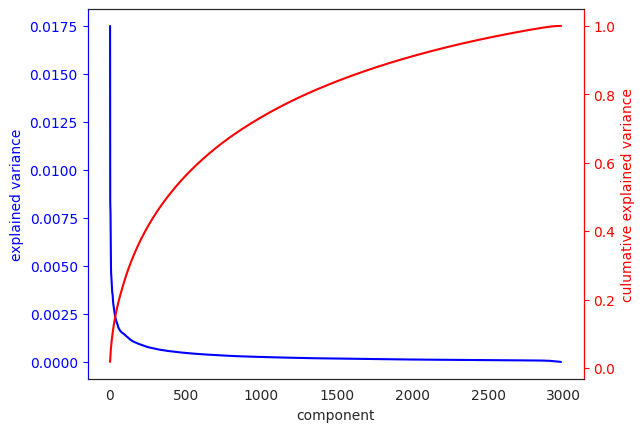

In [10]:
pca_graph(X.toarray())

In [11]:
y = df.funny

In [12]:
umap_embedding = umap.UMAP(n_components=2, n_jobs=-1, verbose=1, random_state=314).fit_transform(X)    

/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=314, verbose=1)
Sun Nov 17 02:03:29 2024 Construct fuzzy simplicial set
Sun Nov 17 02:03:29 2024 Finding Nearest Neighbors
Sun Nov 17 02:03:29 2024 Building RP forest with 21 trees
Sun Nov 17 02:04:20 2024 metric NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Sun Nov 17 02:05:12 2024 Finished Nearest Neighbor Search
Sun Nov 17 02:05:16 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sun Nov 17 02:07:41 2024 Finished embedding


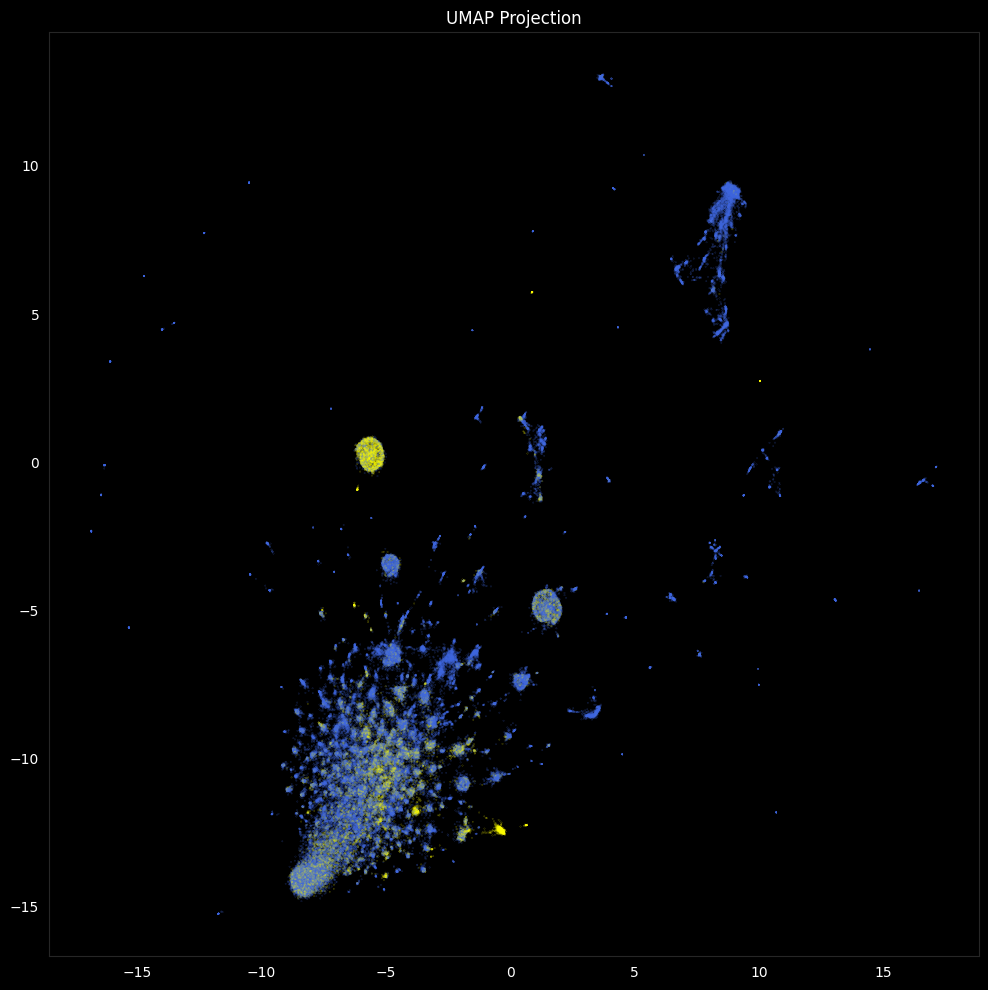

In [13]:
umap_graph(umap_embedding, y)